In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from math import log
import math
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier

In [2]:
headernames = ["age", "bp", "specific gravity", "albumin", "Sugar","RBC", "pus cell", "pus cell clumps", "Bac","BGR", "blood urea", "serum creatinine", "Na", "K", "hemo", "pcv", "WBC count","RBC count","hypertension","diabetes mellitus","coronary artery disease","appetite", "pedal edema","anemia", "class"]
dataset = pd.read_csv("CKDNaN.csv", names = headernames)
dataset

,age,bp,specific gravity,albumin,Sugar,RBC,pus cell,pus cell clumps,Bac,BGR,...,pcv,WBC count,RBC count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,121,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
AccDict={}

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   bp                       400 non-null    int64  
 2   specific gravity         400 non-null    float64
 3   albumin                  400 non-null    int64  
 4   Sugar                    400 non-null    int64  
 5   RBC                      398 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   Bac                      400 non-null    object 
 9   BGR                      400 non-null    int64  
 10  blood urea               400 non-null    float64
 11  serum creatinine         400 non-null    float64
 12  Na                       397 non-null    float64
 13  K                        397 non-null    float64
 14  hemo                     4

In [5]:
dataset.isnull().sum()

age                        0
bp                         0
specific gravity           0
albumin                    0
Sugar                      0
RBC                        2
pus cell                   0
pus cell clumps            0
Bac                        0
BGR                        0
blood urea                 0
serum creatinine           0
Na                         3
K                          3
hemo                       0
pcv                        0
WBC count                  0
RBC count                  0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [6]:
dataset['RBC'].unique()
dataset['Na'].unique()
dataset['K'].unique()

array([ nan,  2.5,  3.2,  4. ,  3.7,  4.2,  5.8,  3.4,  6.4,  4.9,  4.1,
        4.3,  5.2,  3.8,  4.6,  3.9,  4.7,  5.9,  4.8,  4.4,  6.6, 39. ,
        5.5,  5. ,  3.5,  3.6,  7.6,  2.9,  4.5,  5.7,  5.4,  5.3, 47. ,
        6.3,  5.1,  5.6,  3. ,  2.8,  2.7,  6.5,  3.3])

In [7]:
dataset['RBC'].fillna(dataset['RBC'].mode()[0], inplace=True)
dataset['Na'].fillna(dataset['Na'].median(), inplace=True)
dataset['K'].fillna(dataset['K'].median(), inplace=True)

In [8]:
dataset.isnull().sum()

age                        0
bp                         0
specific gravity           0
albumin                    0
Sugar                      0
RBC                        0
pus cell                   0
pus cell clumps            0
Bac                        0
BGR                        0
blood urea                 0
serum creatinine           0
Na                         0
K                          0
hemo                       0
pcv                        0
WBC count                  0
RBC count                  0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [9]:
dataset['class'] = dataset['class'].replace(['ckd\t'],'ckd')
dataset

,age,bp,specific gravity,albumin,Sugar,RBC,pus cell,pus cell clumps,Bac,BGR,...,pcv,WBC count,RBC count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,121,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(['\tno'],'no')
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace([' yes'],'yes')
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(['\tyes'],'yes')
dataset['coronary artery disease'] = dataset['coronary artery disease'].replace(['\tno'],'no')
labels,counts =  pd.factorize(dataset['coronary artery disease'])
print(counts)

Index(['no', 'yes'], dtype='object')


<AxesSubplot:title={'center':'CKD'}, xlabel='CKD and NonCKD', ylabel='Count'>

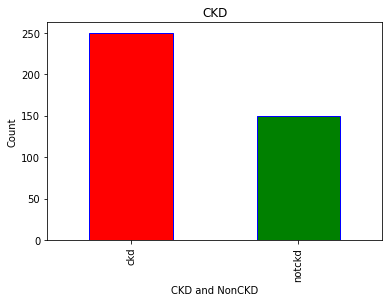

In [11]:
plt.title('CKD')
plt.xlabel('CKD and NonCKD')
plt.ylabel('Count')

dataset['class'].value_counts().plot.bar(color=['red', 'green'],edgecolor='blue')

<AxesSubplot:title={'center':'bac'}>

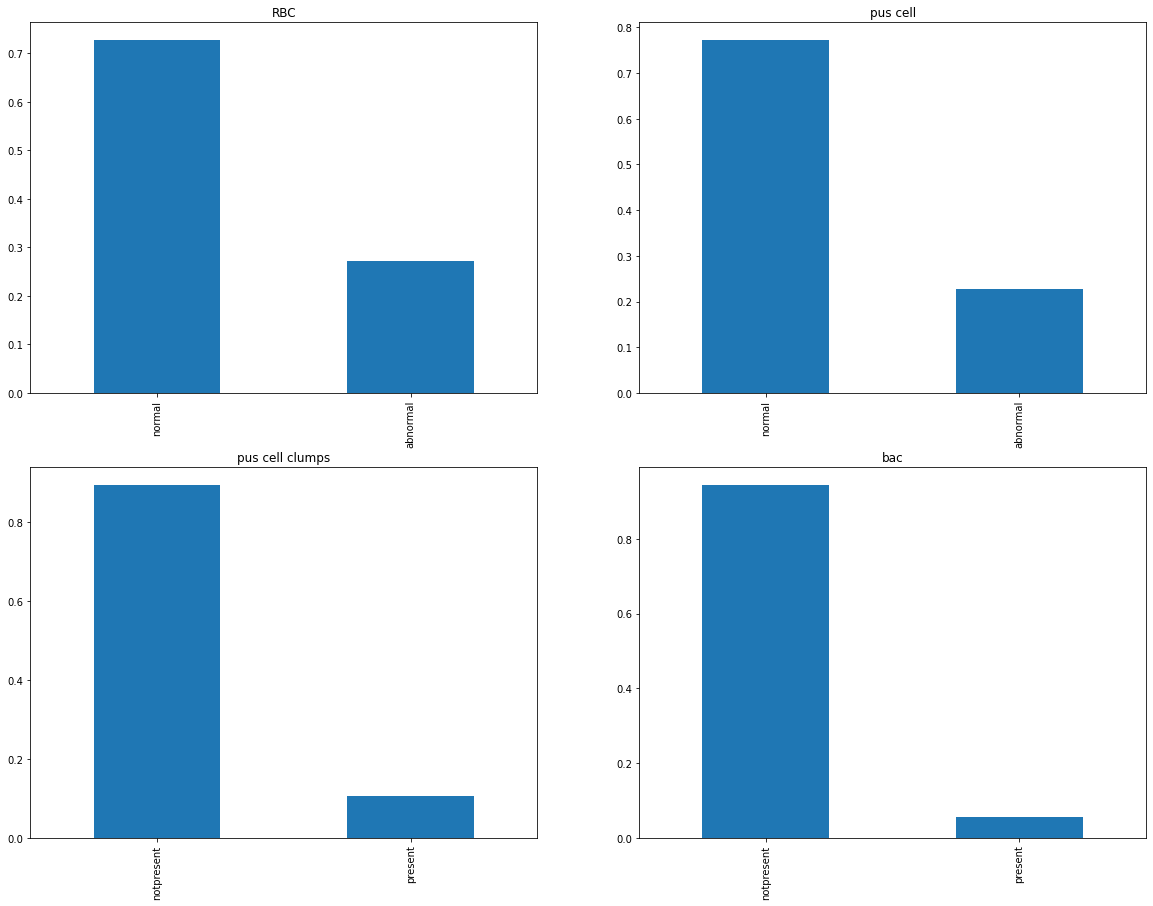

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
dataset['RBC'].value_counts(normalize=True).plot.bar(title='RBC')
plt.subplot(2,2,2)
dataset['pus cell'].value_counts(normalize=True).plot.bar(title='pus cell')
plt.subplot(2,2,3)
dataset['pus cell clumps'].value_counts(normalize=True).plot.bar(title='pus cell clumps')
plt.subplot(2,2,4)
dataset['Bac'].value_counts(normalize=True).plot.bar(title='bac')

<AxesSubplot:title={'center':'anemia'}>

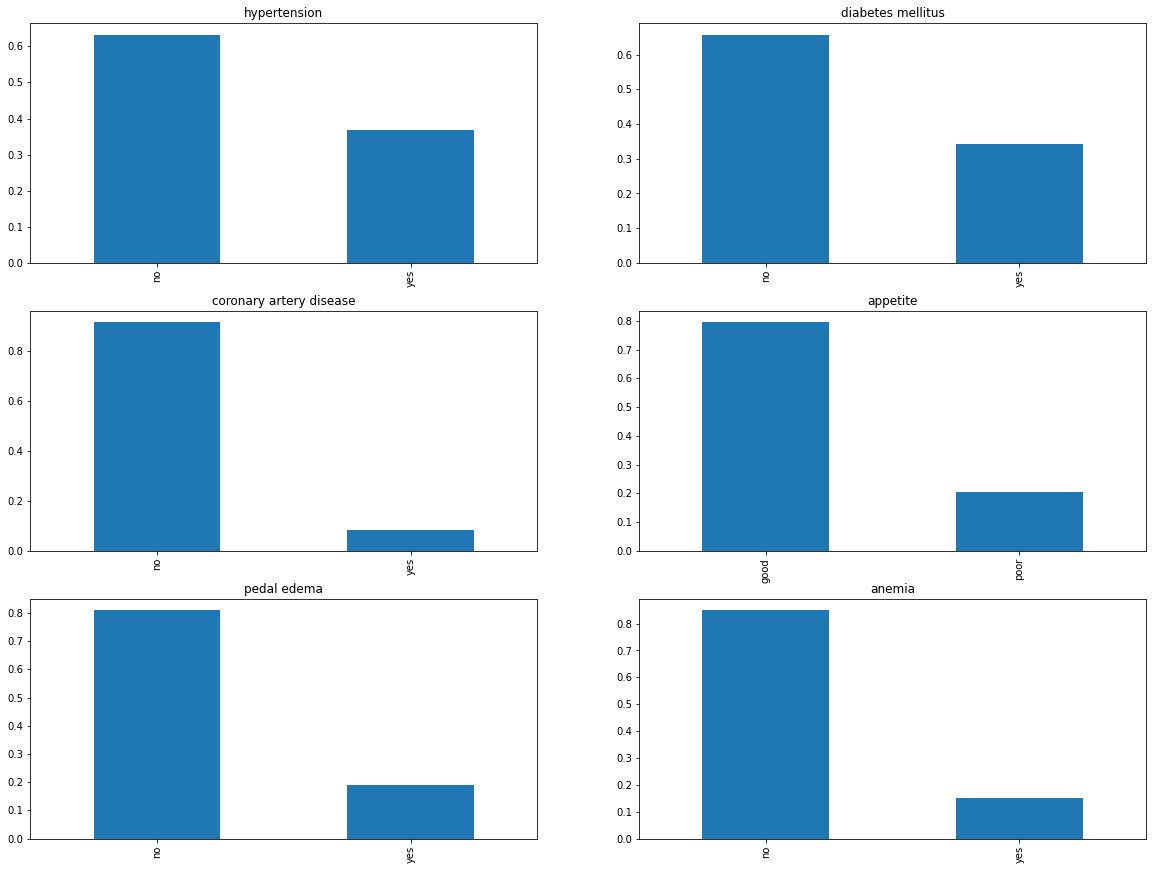

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
dataset['hypertension'].value_counts(normalize=True).plot.bar(title='hypertension')
plt.subplot(3,2,2)
dataset['diabetes mellitus'].value_counts(normalize=True).plot.bar(title='diabetes mellitus')
plt.subplot(3,2,3)
dataset['coronary artery disease'].value_counts(normalize=True).plot.bar(title='coronary artery disease')
plt.subplot(3,2,4)
dataset['appetite'].value_counts(normalize=True).plot.bar(title='appetite')
plt.subplot(3,2,5)
dataset['pedal edema'].value_counts(normalize=True).plot.bar(title='pedal edema')
plt.subplot(3,2,6)
dataset['anemia'].value_counts(normalize=True).plot.bar(title='anemia')


In [14]:
# plt.figure(figsize=(40,30))
# plt.subplot(5,2,1)
# dataset['RBC'].value_counts(normalize=True).plot.bar(title='RBC')
# plt.subplot(5,2,2)
# dataset['pus cell'].value_counts(normalize=True).plot.bar(title='pus cell')
# plt.subplot(5,2,3)
# dataset['pus cell clumps'].value_counts(normalize=True).plot.bar(title='pus cell clumps')
# plt.subplot(5,2,4)
# dataset['Bac'].value_counts(normalize=True).plot.bar(title='bac')


# plt.subplot(5,2,5)
# dataset['hypertension'].value_counts(normalize=True).plot.bar(title='hypertension')
# plt.subplot(5,2,6)
# dataset['diabetes mellitus'].value_counts(normalize=True).plot.bar(title='diabetes mellitus')
# plt.subplot(5,2,7)
# dataset['coronary artery disease'].value_counts(normalize=True).plot.bar(title='coronary artery disease')
# plt.subplot(5,2,8)
# dataset['appetite'].value_counts(normalize=True).plot.bar(title='appetite')
# plt.subplot(5,2,9)
# dataset['pedal edema'].value_counts(normalize=True).plot.bar(title='pedal edema')
# plt.subplot(5,2,10)
# dataset['anemia'].value_counts(normalize=True).plot.bar(title='anemia')


In [15]:
dataset.info()
labels,counts = pd.factorize(dataset['RBC'])
dataset['RBC'] = labels
labels,counts = pd.factorize(dataset['pus cell'])
dataset['pus cell'] = labels
labels,counts = pd.factorize(dataset['pus cell clumps'])
dataset['pus cell clumps'] = labels
labels,counts = pd.factorize(dataset['Bac'])
dataset['Bac'] = labels
labels,counts = pd.factorize(dataset['pcv'])
dataset['pcv'] = labels
labels,counts = pd.factorize(dataset['WBC count'])
dataset['WBC count'] = labels
labels,counts = pd.factorize(dataset['RBC count'])
dataset['RBC count'] = labels
labels,counts = pd.factorize(dataset['hypertension'])
dataset['hypertension'] = labels
labels,counts = pd.factorize(dataset['diabetes mellitus'])
dataset['diabetes mellitus'] = labels
labels,counts = pd.factorize(dataset['coronary artery disease'])
dataset['coronary artery disease'] = labels
labels,counts = pd.factorize(dataset['appetite'])
dataset['appetite'] = labels
labels,counts = pd.factorize(dataset['pedal edema'])
dataset['pedal edema'] = labels
labels,counts = pd.factorize(dataset['anemia'])
dataset['anemia'] = labels
labels,counts = pd.factorize(dataset['class'])
dataset['class'] = labels

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   bp                       400 non-null    int64  
 2   specific gravity         400 non-null    float64
 3   albumin                  400 non-null    int64  
 4   Sugar                    400 non-null    int64  
 5   RBC                      400 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   Bac                      400 non-null    object 
 9   BGR                      400 non-null    int64  
 10  blood urea               400 non-null    float64
 11  serum creatinine         400 non-null    float64
 12  Na                       400 non-null    float64
 13  K                        400 non-null    float64
 14  hemo                     4

In [16]:

dataset

,age,bp,specific gravity,albumin,Sugar,RBC,pus cell,pus cell clumps,Bac,BGR,...,pcv,WBC count,RBC count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48,80,1.020,1,0,0,0,0,0,121,...,0,0,0,0,0,0,0,0,0,0
1,7,50,1.020,4,0,0,0,0,0,121,...,1,1,0,1,1,0,0,0,0,0
2,62,80,1.010,2,3,0,0,0,0,423,...,2,2,0,1,0,0,1,0,1,0
3,48,70,1.005,4,0,0,1,1,0,117,...,3,3,1,0,1,0,1,1,1,0
4,51,80,1.010,2,0,0,0,0,0,106,...,4,4,2,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,0,0,0,0,140,...,37,3,15,1,1,0,0,0,0,1
396,42,70,1.025,0,0,0,0,0,0,75,...,43,0,36,1,1,0,0,0,0,1
397,12,80,1.020,0,0,0,0,0,0,100,...,39,91,34,1,1,0,0,0,0,1
398,17,60,1.025,0,0,0,0,0,0,114,...,42,29,44,1,1,0,0,0,0,1


In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
X

array([[48.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  0.   ,  0.   ]])

In [19]:
X = preprocessing.normalize(X)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size = 0.25, random_state=42)

In [21]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)
y_pred = logistic_Regression.predict(x_test)
log = accuracy_score(y_pred,y_test)*100
li = {'Logistic Regression':log}
AccDict.update(li)
print(log)

84.0


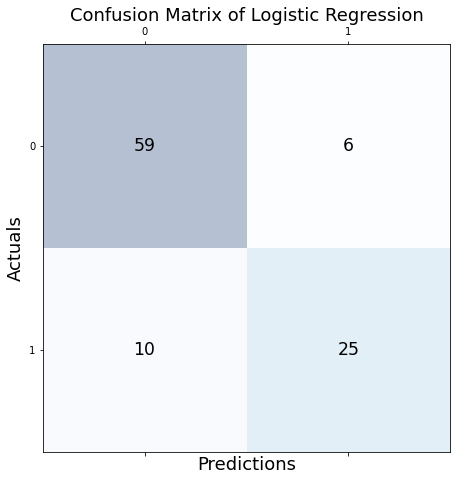

In [22]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

In [23]:
# print(classification_report(y_pred,y_test))

In [24]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
KNN = accuracy_score(pred_knn,y_test)*100
ki = {'KNN before':KNN}
AccDict.update(ki)
print(KNN)


86.0


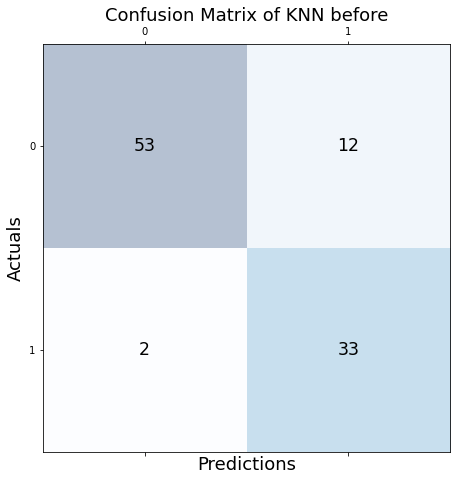

In [25]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN before', fontsize=18)
plt.show()

Text(0, 0.5, 'error rate')

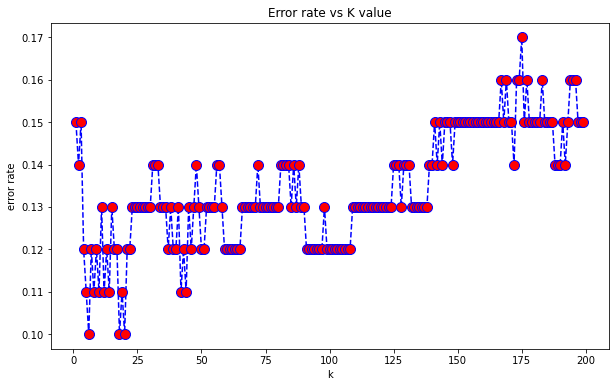

In [26]:
error=[]
for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

In [27]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train,y_train)
pred_knn2 = knn2.predict(x_test)
KNN2 = accuracy_score(pred_knn2,y_test)*100
ki2 = {'KNN after':KNN2}
AccDict.update(ki2)
print(KNN2)


89.0


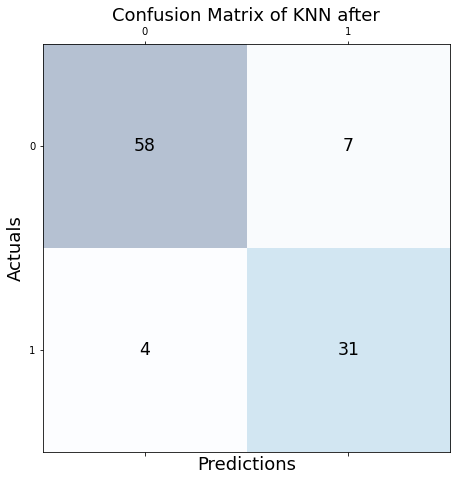

In [28]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn2)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN after', fontsize=18)
plt.show()

In [29]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
GNB = accuracy_score(pred_gnb,y_test)*100
gb = {'Naive Bayes':GNB}
AccDict.update(gb)
print(f"classification report of naive bayes is: ")
print(classification_report(y_test,pred_gnb))

99.0
classification report of naive bayes is: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.97      1.00      0.99        35

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



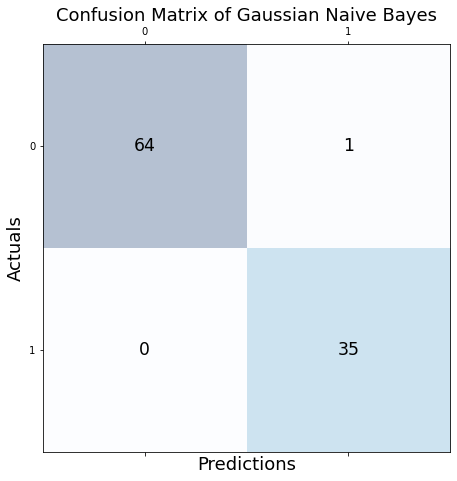

In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_gnb)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Gaussian Naive Bayes', fontsize=18)
plt.show()

In [31]:
svc = SVC(max_iter=1000,random_state=0)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
SVC = accuracy_score(pred_svc,y_test)*100
sv = {'SVC':SVC}
AccDict.update(sv)
print(SVC)

90.0


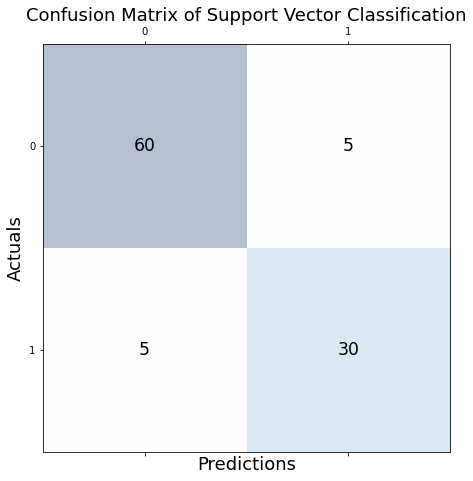

In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_svc)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Support Vector Classification', fontsize=18)
plt.show()

In [33]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)
pred = adaboost.predict(x_test)
ada = accuracy_score(y_test,pred)*100
ad = {'adaboost':ada}
AccDict.update(ad)
print(f"classification report of AdaBoost is:")
print(classification_report(y_test,pred))

classification report of AdaBoost is:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.97      1.00      0.99        35

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



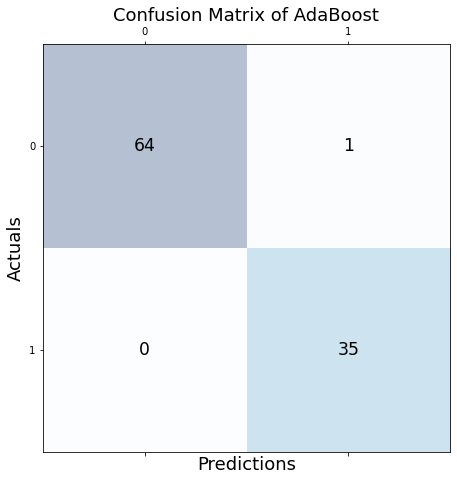

In [34]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of AdaBoost', fontsize=18)
plt.show()

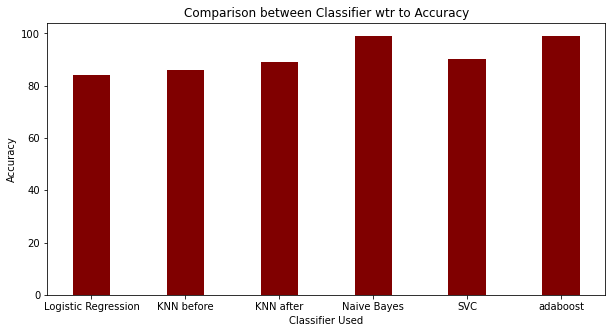

In [35]:
# creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
Classifier = list(AccDict.keys())
Accuracy = list(AccDict.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Classifier, Accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifier wtr to Accuracy")
plt.show()